In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In [5]:
df.shape

(891, 12)

Dataset contains 891 rows and 12 columns

Let's check for Null values

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age feature contains 177 null values and Cabin feature contains 687 null values and Embarked contains 2 null values. Let's replace null values with fillna method

In [7]:
df['Age'].mode()

0    24.0
Name: Age, dtype: float64

In [8]:
df['Age']=df['Age'].fillna(df['Age'].mode()[0])

In [9]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [11]:
df['Cabin']=df['Cabin'].fillna(df['Cabin'].mode()[0])

In [12]:
df['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [13]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

After filling null values let's check again whether all the null values are filled or not

In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

There are no null values in the dataset.
Let's check the statistical information of the dataset.

In [15]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In Age,Fare features mean is greater than 50% of data, so data maybe right skewed and there is huge difference between 75% and max values , so there can be outliers.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


As, per my analysis PassengerId column doesn't contribute in predicting the target variable. Let's drop that feature.

In [18]:
df.drop(columns='PassengerId',axis=1,inplace=True)

In [19]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


Let's plot graphs to analyze the data

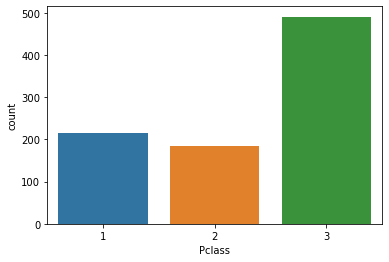

In [20]:
sns.countplot(x='Pclass',data=df)
plt.show()

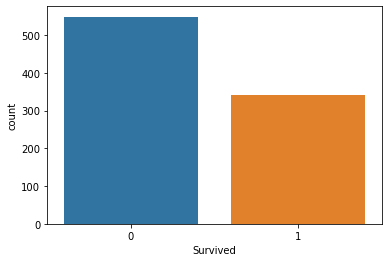

In [21]:
sns.countplot(x='Survived',data=df)
plt.show()

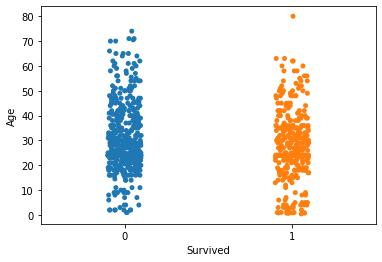

In [22]:
sns.stripplot(x='Survived',y='Age',data=df)
plt.show()

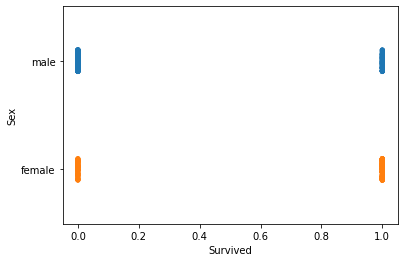

In [23]:
sns.stripplot(x='Survived',y='Sex',data=df)
plt.show()

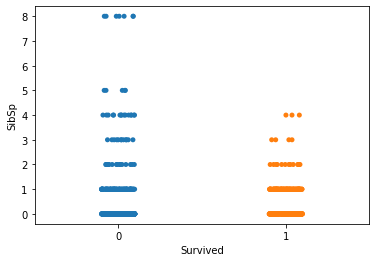

In [24]:
sns.stripplot(x='Survived',y='SibSp',data=df)
plt.show()

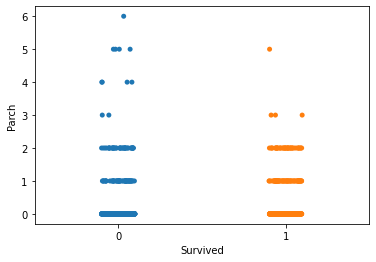

In [25]:
sns.stripplot(x='Survived',y='Parch',data=df)
plt.show()

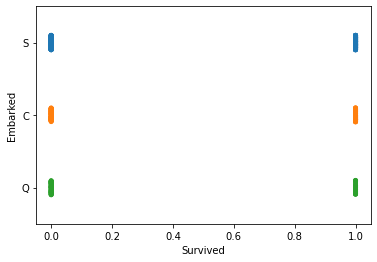

In [26]:
sns.stripplot(x='Survived',y='Embarked',data=df)
plt.show()

Let's check the distribution of the data

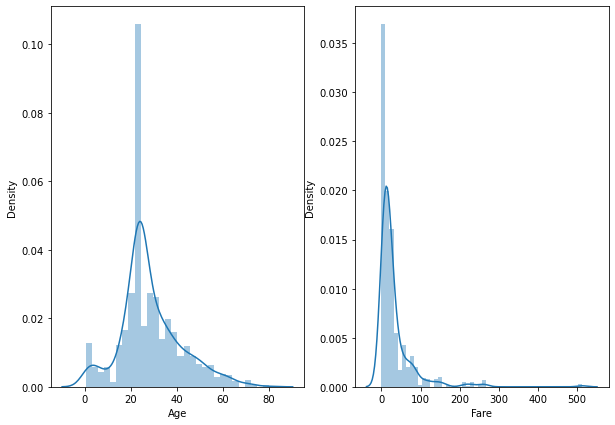

In [27]:
cols=['Age','Fare']
n=1
plt.figure(figsize=(10,7))
for i in cols:
    ax=plt.subplot(1,2,n)
    sns.distplot(x=df[i])
    plt.xlabel(i)
    n+=1
plt.show()    

In Fare feature, data is right skewed. Let's remove the skewenss with cbrt method

In [28]:
df['Fare']=np.cbrt(df['Fare'])

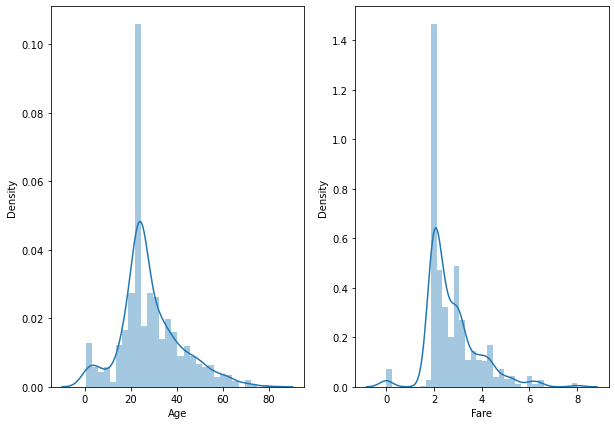

In [29]:
cols=['Age','Fare']
n=1
plt.figure(figsize=(10,7))
for i in cols:
    ax=plt.subplot(1,2,n)
    sns.distplot(x=df[i])
    plt.xlabel(i)
    n+=1
plt.show()    

Now, skewenss in Fare feature is removed.

Let's check outliers with the help of boxplot

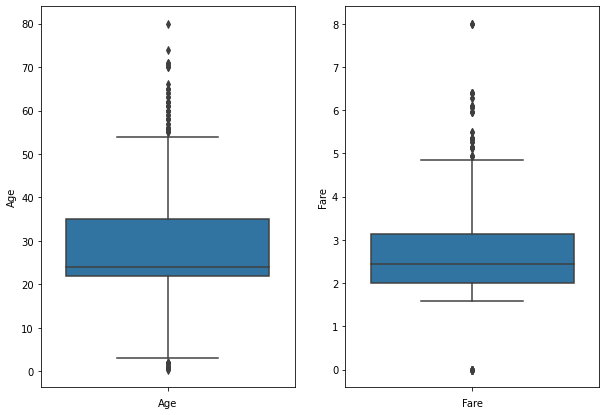

In [30]:
cols=['Age','Fare']
n=1
plt.figure(figsize=(10,7))
for i in cols:
    ax=plt.subplot(1,2,n)
    sns.boxplot(y=df[i])
    plt.xlabel(i)
    n+=1
plt.show()    

outliers are present in Age,Fare feature

In [31]:
q1=df['Fare'].quantile(0.25)
q3=df['Fare'].quantile(0.75)
print(q1)
print(q3)

1.9925045288591225
3.141380652391393


In [32]:
iqr=q3-q1
High=q3+(1.5*iqr)
Low=q3-(1.5*iqr)
print(High)
print(Low)

4.864694837689799
1.4180664670929872


In [33]:
i=np.where(df['Fare']>High)
df.drop(df.index[i],inplace=True)
df.reset_index()

,index,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.935438,B96 B98,S
1,1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.146318,C85,C
2,2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,1.993730,B96 B98,S
3,3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.758647,C123,S
4,4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.004158,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
844,886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,2.351335,B96 B98,S
845,887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,3.107233,B42,S
846,888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,2.862294,B96 B98,S
847,889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,3.107233,C148,C


In [34]:
i=np.where(df['Fare']<Low)
df.drop(df.index[i],inplace=True)
df.reset_index()

,index,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.935438,B96 B98,S
1,1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.146318,C85,C
2,2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,1.993730,B96 B98,S
3,3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.758647,C123,S
4,4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.004158,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
829,886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,2.351335,B96 B98,S
830,887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,3.107233,B42,S
831,888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,2.862294,B96 B98,S
832,889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,3.107233,C148,C


In [35]:
q1=df['Age'].quantile(0.25)
q3=df['Age'].quantile(0.75)
print(q1)
print(q3)

22.0
35.0


In [36]:
iqr=q3-q1
High=q3+(1.5*iqr)
Low=q3-(1.5*iqr)
print(High)
print(Low)

54.5
15.5


In [37]:
i=np.where(df['Age']>High)
df.drop(df.index[i],inplace=True)
df.reset_index()

,index,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.935438,B96 B98,S
1,1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.146318,C85,C
2,2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,1.993730,B96 B98,S
3,3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.758647,C123,S
4,4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.004158,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
790,886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,2.351335,B96 B98,S
791,887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,3.107233,B42,S
792,888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,2.862294,B96 B98,S
793,889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,3.107233,C148,C


In [38]:
i=np.where(df['Age']<Low)
df.drop(df.index[i],inplace=True)
df.reset_index()

,index,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.935438,B96 B98,S
1,1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.146318,C85,C
2,2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,1.993730,B96 B98,S
3,3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.758647,C123,S
4,4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.004158,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
712,886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,2.351335,B96 B98,S
713,887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,3.107233,B42,S
714,888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,2.862294,B96 B98,S
715,889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,3.107233,C148,C


In [39]:
df.shape

(717, 11)

In [40]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.935438,B96 B98,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.146318,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,1.993730,B96 B98,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.758647,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.004158,B96 B98,S


Let's encode the data in categorical colunms

In [41]:
from sklearn.preprocessing import OrdinalEncoder
cols=['Sex','Embarked']
OE=OrdinalEncoder()
for i in cols:
    df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
    
df    

    

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",1.0,22.0,1,0,A/5 21171,1.935438,B96 B98,2.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0.0,38.0,1,0,PC 17599,4.146318,C85,0.0
2,1,3,"Heikkinen, Miss. Laina",0.0,26.0,0,0,STON/O2. 3101282,1.993730,B96 B98,2.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0.0,35.0,1,0,113803,3.758647,C123,2.0
4,0,3,"Allen, Mr. William Henry",1.0,35.0,0,0,373450,2.004158,B96 B98,2.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1.0,27.0,0,0,211536,2.351335,B96 B98,2.0
887,1,1,"Graham, Miss. Margaret Edith",0.0,19.0,0,0,112053,3.107233,B42,2.0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0.0,24.0,1,2,W./C. 6607,2.862294,B96 B98,2.0
889,1,1,"Behr, Mr. Karl Howell",1.0,26.0,0,0,111369,3.107233,C148,0.0


Now data in Sex and Embarked are encoded

In [42]:
df['Cabin'].nunique()

104

In [43]:
df['Ticket'].nunique()

609

As, per my observation Name,Cabin,Ticket feature does not contribute in predicting target variable, Let's drop those features.

In [44]:
df.drop(columns=['Name'],axis=1,inplace=True)

In [45]:
df.drop(columns=['Cabin'],axis=1,inplace=True)
df.drop(columns=['Ticket'],axis=1,inplace=True)
df.shape

(717, 8)

Let's check for MultiCollinearity 

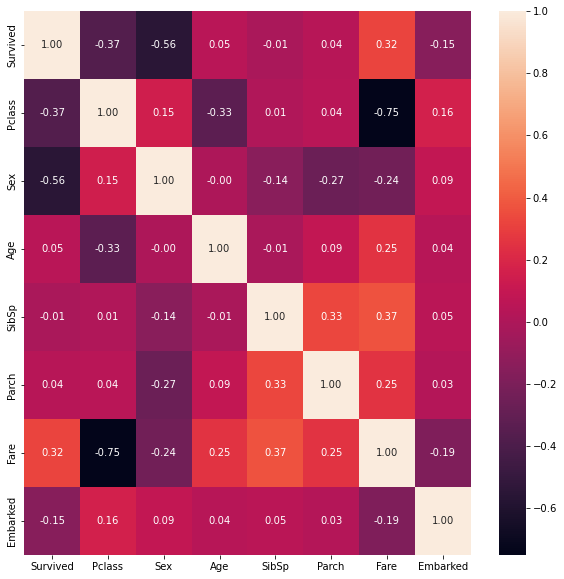

In [46]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.show()

All the features are negatively and positively correlated with target variable. Let's split the data and check for multi collinearity issue.

In [47]:
df.Survived.value_counts()

0    464
1    253
Name: Survived, dtype: int64

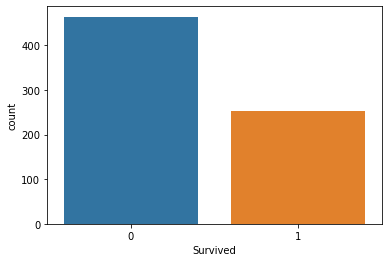

In [48]:
sns.countplot(x='Survived',data=df)
plt.show()

From the above we can observe there is no class imbalance problem.

In [49]:
x=df.drop(columns='Survived',axis=1)
y=df['Survived']

In [50]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

Vif=pd.DataFrame()
Vif['Feature']=x.columns
Vif['Value']=[variance_inflation_factor(x_scaled,i) for i in range(x.shape[1])]
Vif

,Feature,Value
0,Pclass,3.351598
1,Sex,1.127458
2,Age,1.156477
3,SibSp,1.521644
4,Parch,1.333077
5,Fare,3.874346
6,Embarked,1.072539


From the above we can observe there is no Multi collinearity problem.

Let's build and train the model.

Before building the model lets find best random state value

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [53]:
max_acc=0
max_rand=0
for i in range(0,400):
    RFC=RandomForestClassifier()
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    RFC.fit(x_train,y_train)
    y_predict=RFC.predict(x_test)
    acc=accuracy_score(y_test,y_predict)
    if(acc>max_acc):
        max_acc=acc
        max_rand=i
        
print('Best ramdom state is ',max_rand,' and accuracy score is ',max_acc)        

Best ramdom state is  146  and accuracy score is  0.8611111111111112


Best Random state is 335 and accuracy is 87%

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=335)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


In [56]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
y_predict_RFC=RFC.predict(x_test)
acc_score_RFC=accuracy_score(y_test,y_predict_RFC)
print("Accuracy score ",acc_score_RFC)

Accuracy score  0.8611111111111112


In [57]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
y_predict_LR=LR.predict(x_test)
acc_score_LR=accuracy_score(y_test,y_predict_LR)
print("Accuracy is ",acc_score_LR)

Accuracy is  0.8564814814814815


In [58]:
BC=BaggingClassifier()
BC.fit(x_train,y_train)
y_predict_BC=BC.predict(x_test)
acc_score_BC=accuracy_score(y_test,y_predict_BC)
print('Accuracy Score ',acc_score_BC)

Accuracy Score  0.8703703703703703


In [59]:
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
y_predict_GBC=GBC.predict(x_test)
acc_score_GBC=accuracy_score(y_test,y_predict_GBC)
print("accuracy score - ",acc_score_GBC)

accuracy score -  0.8657407407407407


In [60]:
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
y_predict_ABC=ABC.predict(x_test)
acc_score_ABC=accuracy_score(y_test,y_predict_ABC)
print("Accuracy Score ",acc_score_ABC)

Accuracy Score  0.8379629629629629


In [61]:
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
y_predict_ETC=ETC.predict(x_test)
acc_score_ETC=accuracy_score(y_test,y_predict_ETC)
print("Accuracy score ",acc_score_ETC)

Accuracy score  0.8611111111111112


In [62]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
y_predict_DTC=DTC.predict(x_test)
acc_score_DTC=accuracy_score(y_test,y_predict_DTC)
print("Accuracy Score ",acc_score_DTC)

Accuracy Score  0.8148148148148148


In [63]:
Knn=KNeighborsClassifier()
Knn.fit(x_train,y_train)
y_predict_Knn=Knn.predict(x_test)
acc_score_Knn=accuracy_score(y_test,y_predict_Knn)
print('Accuracy Score ',acc_score_Knn)

Accuracy Score  0.7407407407407407


From the above we can observe GradientBoostingClassifier model provides high accuracy rate than other models.

Let's check accuracy score provided by the model is not due overfitting of thr model

In [64]:
score=cross_val_score(RFC,x,y)
print("Mean ",score.mean())
print('Difference is ',acc_score_RFC-score.mean())

Mean  0.8117812742812742
Difference is  0.04932983682983694


In [65]:
score=cross_val_score(LR,x,y)
print("Mean ",score.mean())
print('Difference is ',acc_score_LR-score.mean())

Mean  0.8047882672882674
Difference is  0.051693214193214154


In [66]:
score=cross_val_score(BC,x,y)
print("Mean ",score.mean())
print('Difference is ',acc_score_BC-score.mean())

Mean  0.7950563325563327
Difference is  0.07531403781403767


In [67]:
score=cross_val_score(GBC,x,y)
print("Mean ",score.mean())
print('Difference is ',acc_score_GBC-score.mean())

Mean  0.8271270396270396
Difference is  0.038613701113701104


In [68]:
score=cross_val_score(ABC,x,y)
print("Mean ",score.mean())
print('Difference is ',acc_score_ABC-score.mean())

Mean  0.7992229992229992
Difference is  0.03873996373996369


In [69]:
score=cross_val_score(ETC,x,y)
print("Mean ",score.mean())
print('Difference is ',acc_score_ETC-score.mean())

Mean  0.7894425019425019
Difference is  0.07166860916860929


In [70]:
score=cross_val_score(DTC,x,y)
print("Mean ",score.mean())
print('Difference is ',acc_score_DTC-score.mean())

Mean  0.7950660450660451
Difference is  0.019748769748769712


In [71]:
score=cross_val_score(Knn,x,y)
print("Mean ",score.mean())
print('Difference is ',acc_score_Knn-score.mean())

Mean  0.7531662781662781
Difference is  -0.012425537425537425


From the above we can observe, cross validation score of DecisionTreeClassifer is less and hence we can consider DecisionTreeClassifer as best model.



Let's print confusion matrix,classification report

In [72]:
print('Confusion matrix \n',confusion_matrix(y_test,y_predict_DTC))

Confusion matrix 
 [[112  24]
 [ 16  64]]


In [73]:
print('Classification report\n',classification_report(y_test,y_predict_DTC))

Classification report
               precision    recall  f1-score   support

           0       0.88      0.82      0.85       136
           1       0.73      0.80      0.76        80

    accuracy                           0.81       216
   macro avg       0.80      0.81      0.81       216
weighted avg       0.82      0.81      0.82       216



Let's tune the parameters and try to increase the accuray of the model.

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
param_grid={'criterion':['gini','entropy','log_loss'],
            'splitter':['random','best'],
            'min_samples_split':[7,8,9,10],
            'min_samples_leaf':[2,4,6,8,10,],
    
}

In [76]:
GSV=GridSearchCV(DTC,param_grid=param_grid,cv=3,n_jobs=-1)

In [77]:
GSV.fit(x_train,y_train)
GSV.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 10,
 'min_samples_split': 7,
 'splitter': 'random'}

In [80]:
Best_model=DecisionTreeClassifier(criterion='gini',min_samples_split=5,min_samples_leaf=6,splitter='random')
Best_model.fit(x_train,y_train)
y_predict=Best_model.predict(x_test)
acc_score=accuracy_score(y_test,y_predict)
print('Accuracy Score ',acc_score)

Accuracy Score  0.8564814814814815


With the help of Hyer parameter tuning technique, we have increased accuracy score to 85%. Let's generate classification report and confusion matrix

In [81]:
print('confusion matrix\n',confusion_matrix(y_test,y_predict))

confusion matrix
 [[126  10]
 [ 21  59]]


In [82]:
print('Classification report\n',classification_report(y_test,y_predict))

Classification report
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       136
           1       0.86      0.74      0.79        80

    accuracy                           0.86       216
   macro avg       0.86      0.83      0.84       216
weighted avg       0.86      0.86      0.85       216



In [1]:
from sklearn.metrics import roc_curve,roc_auc_score

In [89]:
fpr,tpr,treshold=roc_curve(y_test,y_predict)

In [90]:
print('fpr ',fpr)
print('tpr ',tpr)
print('treshold ',treshold)

fpr  [0.         0.07352941 1.        ]
tpr  [0.     0.7375 1.    ]
treshold  [2 1 0]


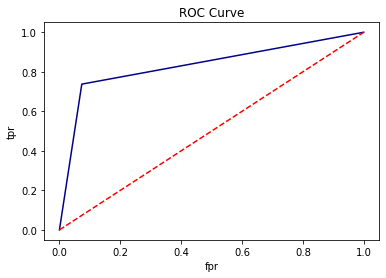

In [92]:
plt.plot(fpr,tpr,color='darkblue')
plt.plot([0,1],[0,1],color='red',linestyle='--')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve')
plt.show()


In [93]:
roc_auc=roc_auc_score(y_test,y_predict)
print('Area under the curve is ',roc_auc)

Area under the curve is  0.8319852941176471


ROC curve is covering 83% area